# Quantum Chemistry Foundations | Hückel Molecular Orbital Theory

In [5]:
import numpy as np
import scipy
from io import StringIO
import matplotlib.pyplot as plt

In [6]:
# xyz = """C       -3.8630769879      1.9471066836      0.0000000000
# C       -2.5745685151      2.4812232234      0.0000000000                 
# C       -1.4677536529      1.6324004219      0.0000000000                 
# C       -1.6494472479      0.2494610640      0.0000000000                 
# C       -2.9379557201     -0.2846554747      0.0000000000                 
# C       -4.0447705822      0.5641673269      0.0000000000                                 
# """

# xyz = """C       -1.5096025658     -0.3105189477     -0.0000028481                 
# C       -0.3801832883      0.4064698306      0.0013158302                 
# C        0.9332707467     -0.1942527584     -0.0000243985                 
# C        2.0628619686      0.5291277528      0.0019271484                 
# C        3.3771453632     -0.0695979415      0.0006000365                 
# C        4.5050471149      0.6502775353      0.0030979342                 
# """

xyz = """C       -1.2015470830      0.1062877085      0.0030068393                 
C       -1.4649632476     -1.2061875541      0.0033362432                 
C        0.0684868198      0.7946377524     -0.0064500725                 
C        1.3052195954      0.2801568803     -0.0113507380                 
C        1.6460601543     -1.1158667742     -0.0098999205                 
C        0.7850271600     -2.2935581868     -0.0095280131                 
C       -0.5530524419     -2.3270402142     -0.0048189262                 
C        2.9102654520     -1.5905549070     -0.0127185652                 
C        1.6293509276     -3.4743004073     -0.0136572657                 
C        2.8987815705     -3.0426622683     -0.0147241934                 
"""

def parse_geometry(xyz):
    data = np.genfromtxt(StringIO(xyz), dtype=[('element', 'U2'), ('x', 'f4'), ('y', 'f4'), ('z', 'f4')])
    return [(row['element'], np.array([row['x'], row['y'], row['z']])) for row in data]

coords = parse_geometry(xyz)
print(coords[0])

N = len(coords)
Nocc = N // 2

('C', array([-1.201547  ,  0.10628771,  0.00300684], dtype=float32))


In [7]:
def build_huckel_hamiltonian(coords, r_cutoff=1.5,alpha=0.0,beta=-1.0):
    N = len(coords)
    H = np.zeros((N, N))
    for i, (_, xyz1) in enumerate(coords):
        for j, (_, xyz2) in enumerate(coords):
            distance = np.linalg.norm(xyz1 - xyz2)
            if distance < r_cutoff:
                if i == j:
                    H[i,i] == alpha
                else:
                    H[i,j] = beta
    return H

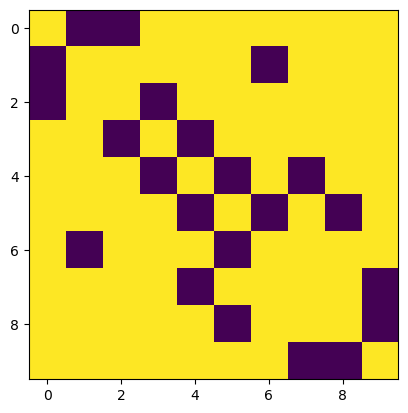

In [8]:
H = build_huckel_hamiltonian(coords, r_cutoff=1.54)
# print(H)
plt.imshow(H)
E, C = np.linalg.eigh(H)

In [9]:
E

array([-2.31027685, -1.65157231, -1.35567429, -0.88697524, -0.47726   ,
        0.40039232,  0.73764031,  1.5792181 ,  1.86921398,  2.09529399])

In [10]:
C[0,:]

array([ 1.72974001e-01,  5.24672155e-01, -2.95222714e-17, -3.60277414e-01,
        1.59908065e-16, -5.10887171e-01,  3.22269633e-16, -3.41574856e-01,
       -4.32805067e-01, -1.47063339e-16])

In [11]:
energy = sum(E[:Nocc])
print(energy)

-6.681758690673483


In [12]:
Cocc = C[:,:N//2]
Cvir = C[:,N//2:]
Cocc

array([[ 1.72974001e-01,  5.24672155e-01, -2.95222714e-17,
        -3.60277414e-01,  1.59908065e-16],
       [ 1.99808914e-01,  4.33267002e-01, -3.57060155e-01,
        -1.59778573e-01,  3.35497212e-01],
       [ 1.99808914e-01,  4.33267002e-01,  3.57060155e-01,
        -1.59778573e-01, -3.35497212e-01],
       [ 2.88639908e-01,  1.90899630e-01,  4.84057274e-01,
         2.18557775e-01, -1.60119398e-01],
       [ 4.67029181e-01, -1.17982460e-01,  2.99163848e-01,
         3.53633909e-01,  2.59078629e-01],
       [ 4.67029181e-01, -1.17982460e-01, -2.99163848e-01,
         3.53633909e-01, -2.59078629e-01],
       [ 2.88639908e-01,  1.90899630e-01, -4.84057274e-01,
         2.18557775e-01,  1.60119398e-01],
       [ 3.23297615e-01, -2.67773734e-01,  2.20675312e-01,
        -2.58527162e-01,  5.42845893e-01],
       [ 3.23297615e-01, -2.67773734e-01, -2.20675312e-01,
        -2.58527162e-01, -5.42845893e-01],
       [ 2.79877812e-01, -3.24265225e-01,  2.21358493e-16,
        -5.82941101e-01

In [13]:
Cocc.T @ H @ Cocc

array([[-2.31027685e+00,  1.96930734e-16,  5.13206577e-17,
        -5.64159273e-16, -2.68466989e-17],
       [ 2.13743912e-16, -1.65157231e+00, -8.65251170e-17,
        -2.51948434e-16, -9.76969865e-19],
       [-1.55305105e-17, -2.48663366e-17, -1.35567429e+00,
        -1.39487747e-16,  7.02485798e-17],
       [-5.21711113e-16, -1.12785485e-16, -1.31482428e-16,
        -8.86975242e-01,  4.91309226e-17],
       [-3.20476087e-17, -3.47823052e-17,  1.32747772e-16,
         3.92437574e-17, -4.77259996e-01]])

In [14]:


def com(coords):
    com_xyz = np.zeros((3))
    for _, xyz in coords:
        com_xyz += xyz
    com_xyz /= len(coords)
    return com_xyz

def plot_mo(coords,c):
    # Define the Gaussian function
    def gaussian(x, y, x0, y0, c, sigma=0.25):
        return c * np.exp(-sigma *((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
    
    x_values = [xyz[0] for _, (_, xyz) in enumerate(coords)]
    y_values = [xyz[1] for _, (_, xyz) in enumerate(coords)]

    # Find the minimum and maximum of x and y
    offset = 2.
    min_x = min(x_values) - offset
    max_x = max(x_values) + offset
    min_y = min(y_values) - offset
    max_y = max(y_values) + offset
    
    com_xyz = com(coords)

    # Define the points and their smearing factor
    points = [(xyz[0],xyz[1],c[i])for i, (_, xyz) in enumerate(coords)]
    # print(points)
    sigma = 0.2

    # Create a grid of points where the Gaussian will be evaluated
    x = np.linspace(min_x, max_x, 100)
    y = np.linspace(min_y, max_y, 100)
    X, Y = np.meshgrid(x, y)

    # Compute the sum of the Gaussians at each point in the grid
    Z = sum(gaussian(X, Y, x0, y0, c) for (x0, y0, c) in points)

    # Make the contour plot
    plt.figure(figsize=(6, 6 * (max_y - min_y)/(max_x - min_x)))
    plt.contourf(X, Y, Z, levels=50, cmap='RdBu', vmin=-1, vmax=1) # use RdBu colormap
    plt.colorbar(label='Amplitude')
    plt.scatter(*zip(*points), color='black')  # Mark the points
    plt.xlim(min_x,max_x)
    plt.ylim(min_y,max_y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Molecular orbital')
    plt.axis('equal')  # Preserve the aspect ratio
    plt.show()


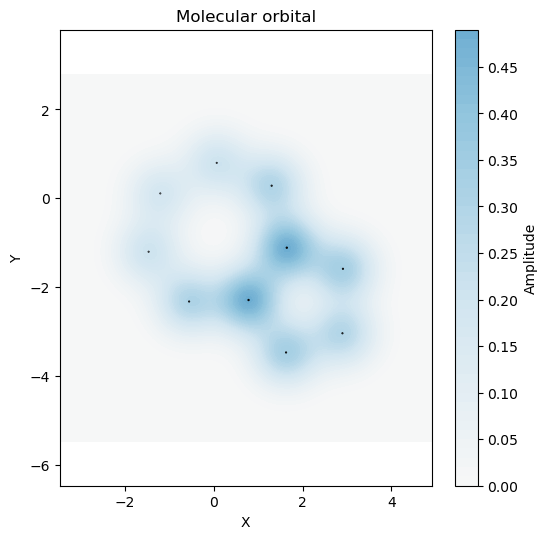

/Users/fevange/miniconda3/envs/forte/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


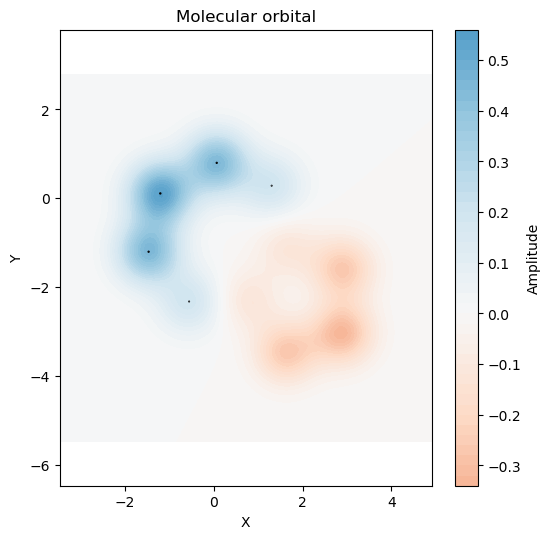

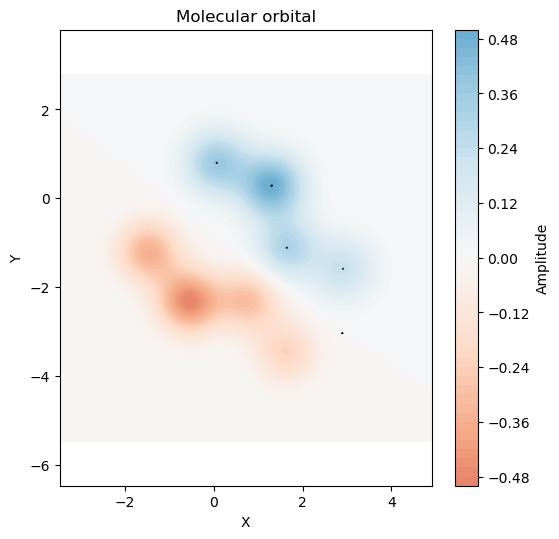

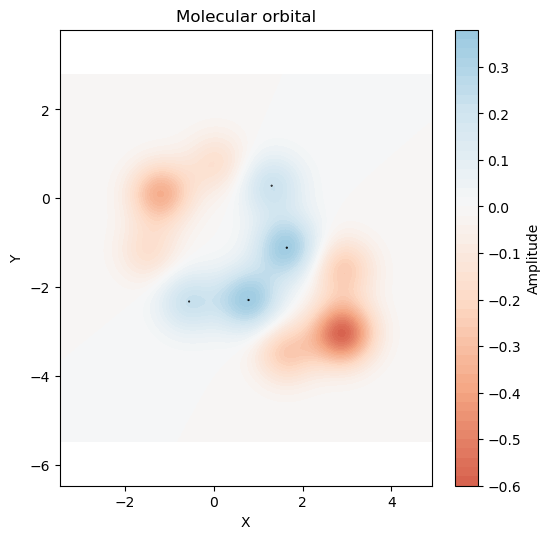

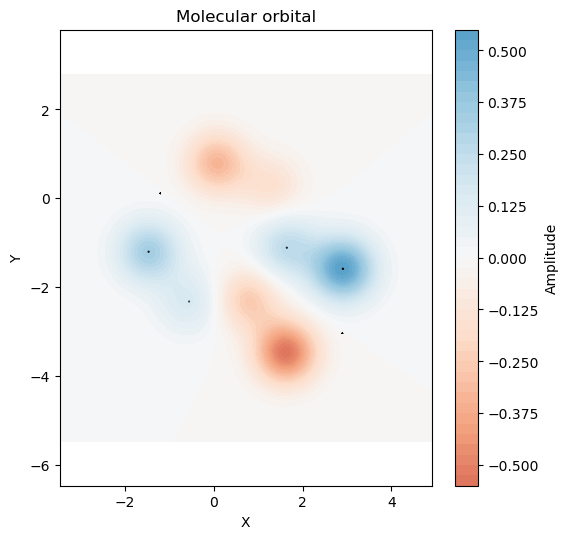

In [15]:
for i in range(Nocc):
    plot_mo(coords,C[:,i])

In [43]:
# def orbital_rotation(C,A):
#     U = scipy.linalg.expm(A)
#     return C @ U

# A = np.zeros((3,3))
# A[0,1] = np.pi / 4
# A[1,0] = -A[0,1]

# Cnew = orbital_rotation(Cocc,A)
# Cnew

In [44]:
# plot_mo(coords,Cnew[:,2])

In [45]:
Cocc.T @ H @ Cocc

array([[-2.31027685e+00,  1.96930734e-16,  5.13206577e-17,
        -5.64159273e-16, -2.68466989e-17],
       [ 2.13743912e-16, -1.65157231e+00, -8.65251170e-17,
        -2.51948434e-16, -9.76969865e-19],
       [-1.55305105e-17, -2.48663366e-17, -1.35567429e+00,
        -1.39487747e-16,  7.02485798e-17],
       [-5.21711113e-16, -1.12785485e-16, -1.31482428e-16,
        -8.86975242e-01,  4.91309226e-17],
       [-3.20476087e-17, -3.47823052e-17,  1.32747772e-16,
         3.92437574e-17, -4.77259996e-01]])

In [46]:
Cnew.T @ H @ Cnew

NameError: name 'Cnew' is not defined

\begin{equation}
L = \sum_i \langle \phi_i | (\mathbf{r} - \mathbf{r}_i)^2 | \phi_i \rangle
= \sum_i \langle \phi_i | \mathbf{r}^2 |\phi_i \rangle - \mathbf{r}_i^2
= \sum_i \langle \phi_i | \mathbf{r}^2 |\phi_i \rangle - (x_i^2 + y_i^2 + z_i^2)
\end{equation}
where
\begin{equation}
x_i =  \langle \phi_i | x | \phi_i \rangle = \sum_\mu \sum_\nu  \langle \chi_\mu |x| \chi_\nu \rangle C_{\mu i} C_{\nu i}
\end{equation}

\begin{equation}
\langle \phi_i | \mathbf{r}^2 |\phi_i \rangle =  \langle \phi_i | \mathbf{r}^2| \phi_i \rangle = \sum_\mu \sum_\nu  \langle \chi_\mu | \mathbf{r}^2| \chi_\nu \rangle C_{\mu i} C_{\nu i}
\end{equation}


In [47]:
def xop(i,j,xyz1,xyz2):
    if i == j:
        return xyz1[0]
    else:
        return 0.0 * (xyz1[0] + xyz2[0])
    return 0.0

def yop(i,j,xyz1,xyz2):
    if i == j:
        return xyz1[1]
    else:
        return 0.0 * (xyz1[1] + xyz2[1])    
    return 0.0

def r2op(i,j,xyz1,xyz2):
    if i == j:
        return xyz1[0] ** 4 + xyz1[1] ** 2
    else:
        return 0.0 * ((xyz1[0] + xyz2[0]) ** 4 + (xyz1[1] + xyz2[1]) ** 4 )
    return 0.0

def build_op_matrix(coords, op, r_cutoff=1.45):
    N = len(coords)
    H = np.zeros((N, N))
    for i, (_, xyz1) in enumerate(coords):
        for j, (_, xyz2) in enumerate(coords):
            distance = np.linalg.norm(xyz1 - xyz2)
            if distance < r_cutoff:
                H[i,j] = op(i,j,xyz1,xyz2)
    return H
    
xmat = build_op_matrix(coords, xop)
ymat = build_op_matrix(coords, yop)
r2mat = build_op_matrix(coords, r2op)

In [48]:
vec = np.array([1,2,3])
n = 3
upper_tri = np.zeros((n, n))
upper_tri[np.triu_indices(n, 1)] = vec
upper_tri -= upper_tri.T
upper_tri

array([[ 0.,  1.,  2.],
       [-1.,  0.,  3.],
       [-2., -3.,  0.]])

In [49]:
def vec_to_antisymm(vec):
    n = int((np.sqrt(8*len(vec)+1)+1)/2)  # Compute the size of the matrix
    A = np.zeros((n, n))
    A[np.triu_indices(n, 1)] = vec  # Fill the upper triangle with the vector
    A -= A.T
    return A

def objective(vec):
    A = vec_to_antisymm(vec)  # Convert to antisymmetric matrix
    Cnew = Cocc @ scipy.linalg.expm(A)
    L = np.trace(Cnew.T @ r2mat @ Cnew)  -  np.trace((Cnew.T @ xmat @ Cnew) ** 2)-  np.trace((Cnew.T @ ymat @ Cnew) ** 2)
    return L

In [50]:
from scipy.optimize import minimize

init_vec = np.random.rand(Nocc * (Nocc - 1)//2)  # Initial guess
res = minimize(objective, init_vec, method='BFGS')
final_A = vec_to_antisymm(res.x)

print('The optimized antisymmetric matrix is:')
print(final_A)

The optimized antisymmetric matrix is:
[[ 0.          0.40391619  0.42987061  0.5111467   0.79744416]
 [-0.40391619  0.          0.1838983   0.74367956 -0.47612886]
 [-0.42987061 -0.1838983   0.          0.96048365 -0.68654893]
 [-0.5111467  -0.74367956 -0.96048365  0.          1.15905335]
 [-0.79744416  0.47612886  0.68654893 -1.15905335  0.        ]]


In [51]:
Cnew = orbital_rotation(Cocc,final_A)

NameError: name 'orbital_rotation' is not defined

In [52]:
for i in range(Nocc):
    plot_mo(coords,Cnew[:,i])

NameError: name 'Cnew' is not defined

In [53]:
c60 = """C        0.0000000000      1.2363020000      3.3275360000                 
C       -1.1757930000      0.3820380000      3.3275360000                 
C       -0.7266800000     -1.0001890000      3.3275360000                 
C        0.7266800000     -1.0001890000      3.3275360000                 
C        1.1757930000      0.3820380000      3.3275360000                 
C        2.3047410000      0.7488560000      2.5939020000                 
C        3.0314210000     -0.2513340000      1.8298250000                 
C        2.6002010000     -1.5784910000      1.8298250000                 
C        1.4244080000     -1.9605300000      2.5939020000                 
C        0.6977280000     -2.9607190000      1.8298250000                 
C       -0.6977280000     -2.9607190000      1.8298250000                 
C       -1.4244080000     -1.9605300000      2.5939020000                 
C       -2.6002010000     -1.5784910000      1.8298250000                 
C       -3.0314210000     -0.2513340000      1.8298250000                 
C       -2.3047410000      0.7488560000      2.5939020000                 
C       -2.3047410000      1.9851580000      1.8298250000                 
C       -3.0314210000      1.7490450000      0.5935230000                 
C       -3.4805340000      0.3668170000      0.5935230000                 
C       -3.4805340000     -0.3668170000     -0.5935230000                 
C       -3.0314210000     -1.7490450000     -0.5935230000                 
C       -2.6002010000     -2.3425680000      0.5935230000                 
C       -1.4244080000     -3.1968320000      0.5935230000                 
C       -0.7266800000     -3.4235370000     -0.5935230000                 
C        0.7266800000     -3.4235370000     -0.5935230000                 
C        1.4244080000     -3.1968320000      0.5935230000                 
C        2.6002010000     -2.3425680000      0.5935230000                 
C        3.0314210000     -1.7490450000     -0.5935230000                 
C        3.4805340000     -0.3668170000     -0.5935230000                 
C        3.4805340000      0.3668170000      0.5935230000                 
C        3.0314210000      1.7490450000      0.5935230000                 
C        2.6002010000      2.3425680000     -0.5935230000                 
C        2.6002010000      1.5784910000     -1.8298250000                 
C        3.0314210000      0.2513340000     -1.8298250000                 
C        2.3047410000     -0.7488560000     -2.5939020000                 
C        2.3047410000     -1.9851580000     -1.8298250000                 
C        1.1757930000     -2.8053860000     -1.8298250000                 
C        0.0000000000     -2.4233480000     -2.5939020000                 
C       -1.1757930000     -2.8053860000     -1.8298250000                 
C       -2.3047410000     -1.9851580000     -1.8298250000                 
C       -2.3047410000     -0.7488560000     -2.5939020000                 
C       -3.0314210000      0.2513340000     -1.8298250000                 
C       -2.6002010000      1.5784910000     -1.8298250000                 
C       -2.6002010000      2.3425680000     -0.5935230000                 
C       -1.4244080000      3.1968320000     -0.5935230000                 
C       -0.6977280000      2.9607190000     -1.8298250000                 
C       -1.4244080000      1.9605300000     -2.5939020000                 
C       -0.7266800000      1.0001890000     -3.3275360000                 
C       -1.1757930000     -0.3820380000     -3.3275360000                 
C        0.0000000000     -1.2363020000     -3.3275360000                 
C        1.1757930000     -0.3820380000     -3.3275360000                 
C        0.7266800000      1.0001890000     -3.3275360000                 
C        1.4244080000      1.9605300000     -2.5939020000                 
C        0.6977280000      2.9607190000     -1.8298250000                 
C        1.4244080000      3.1968320000     -0.5935230000                 
C        0.7266800000      3.4235370000      0.5935230000                 
C       -0.7266800000      3.4235370000      0.5935230000                 
C       -1.1757930000      2.8053860000      1.8298250000                 
C        0.0000000000      2.4233480000      2.5939020000                 
C        1.1757930000      2.8053860000      1.8298250000                 
C        2.3047410000      1.9851580000      1.8298250000                 
"""

[-3.         -2.75659825 -2.75659825 -2.75659825 -2.30277564 -2.30277564
 -2.30277564 -2.30277564 -2.30277564 -1.82024925 -1.82024925 -1.82024925
 -1.56155281 -1.56155281 -1.56155281 -1.56155281 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.61803399 -0.61803399 -0.61803399 -0.61803399 -0.61803399
  0.13856427  0.13856427  0.13856427  0.38196601  0.38196601  0.38196601
  1.30277564  1.30277564  1.30277564  1.30277564  1.30277564  1.43828324
  1.43828324  1.43828324  1.61803399  1.61803399  1.61803399  1.61803399
  1.61803399  2.          2.          2.          2.          2.56155281
  2.56155281  2.56155281  2.56155281  2.61803399  2.61803399  2.61803399]


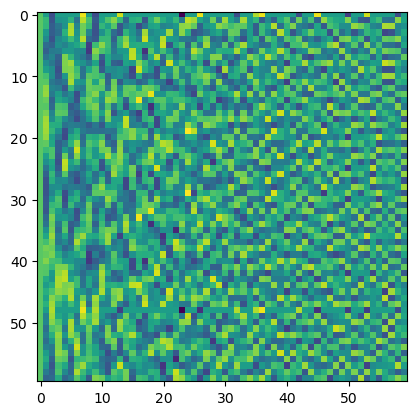

In [55]:
c60_coords = parse_geometry(c60)
Hc60 = build_huckel_hamiltonian(c60_coords)
plt.imshow(Hc60)
evals, evecs = np.linalg.eigh(Hc60)
print(evals)
plt.imshow(evecs)